In [ ]:
# Testing of dynamic model by dropping variables from variables list and recording accuracy

In [1]:
import fastf1 as f1
from pyergast import pyergast 

import pandas as pd
import numpy as np
import os 

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from datetime import datetime
import time 

In [2]:
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2

In [3]:
active_constructors = ['Alpine F1 Team', 'Williams', 'McLaren', 'Ferrari', 'Mercedes',
                       'AlphaTauri', 'Aston Martin', 'Alfa Romeo', 'Red Bull',
                       'Haas F1 Team']

active_drivers = ['Daniel Ricciardo', 'Nikita Mazepin', 'Carlos Sainz',
                  'Valtteri Bottas', 'Lance Stroll', 'George Russell',
                  'Lando Norris', 'Sebastian Vettel', 'Kimi Räikkönen',
                  'Charles Leclerc', 'Lewis Hamilton', 'Yuki Tsunoda',
                  'Max Verstappen', 'Pierre Gasly', 'Mick Schumacher',
                  'Sergio Pérez', 'Esteban Ocon', 'Antonio Giovinazzi',
                  'Fernando Alonso','Nicholas Latifi']

active_drivers_numbers = [99, 5, 33, 47, 22, 6, 9, 55, 18, 77, 4, 14, 10, 11, 63, 16, 7, 31, 3, 44, 88]

In [4]:
dynamic_X_features = pd.read_csv("dynamic_X_features_final.csv")
dynamic_X_targets = pd.read_csv("dynamic_X_targets.csv")

In [5]:
pd.set_option("display.max_columns", None)
dynamic_X_features

,year,GP_name,round,driver,lap,compound,tyre_life,pitstop,Avg_lap_time,air_temp,air_pressure,humidity,track_temp,quali_position,grid_position,n_wins,n_podiums,n_points_finishes,end_status,active_driver,circuit_name,date,total_laps,laps_remaining,driver_name,constructor,current_position
0,2018,Chinese Grand Prix,3,20,1,C3,6,0,102.220000,19.6,1018.4,23.4,38.6,11,11,0,0,0,Finished,0,Shanghai International Circuit,2018-04-15,56,55,Kevin Magnussen,Haas F1 Team,11
1,2018,Chinese Grand Prix,3,20,2,C3,7,0,102.220000,19.6,1018.3,23.6,38.5,11,11,0,0,0,Finished,0,Shanghai International Circuit,2018-04-15,56,54,Kevin Magnussen,Haas F1 Team,10
2,2018,Chinese Grand Prix,3,20,3,C3,8,0,101.879667,19.6,1018.4,23.5,38.2,11,11,0,0,0,Finished,0,Shanghai International Circuit,2018-04-15,56,53,Kevin Magnussen,Haas F1 Team,10
3,2018,Chinese Grand Prix,3,20,4,C3,9,0,101.589750,19.5,1018.3,23.3,38.0,11,11,0,0,0,Finished,0,Shanghai International Circuit,2018-04-15,56,52,Kevin Magnussen,Haas F1 Team,10
4,2018,Chinese Grand Prix,3,20,5,C3,10,0,101.551200,19.8,1018.3,22.9,38.1,11,11,0,0,0,Finished,0,Shanghai International Circuit,2018-04-15,56,51,Kevin Magnussen,Haas F1 Team,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92037,2021,Abu Dhabi Grand Prix,22,44,54,C1,40,0,90.392611,23.7,1017.9,64.3,25.9,2,2,39,60,72,Finished,1,Yas Marina Circuit,2021-12-12,58,4,Lewis Hamilton,Mercedes,1
92038,2021,Abu Dhabi Grand Prix,22,44,55,C1,41,0,91.347491,23.7,1018.0,64.6,26.0,2,2,39,60,72,Finished,1,Yas Marina Circuit,2021-12-12,58,3,Lewis Hamilton,Mercedes,1
92039,2021,Abu Dhabi Grand Prix,22,44,56,C1,42,0,92.319161,23.7,1018.1,64.1,25.9,2,2,39,60,72,Finished,1,Yas Marina Circuit,2021-12-12,58,2,Lewis Hamilton,Mercedes,1
92040,2021,Abu Dhabi Grand Prix,22,44,57,C1,43,0,93.301825,23.7,1018.1,64.6,25.8,2,2,39,60,72,Finished,1,Yas Marina Circuit,2021-12-12,58,1,Lewis Hamilton,Mercedes,1


In [6]:
dynamic_X_targets["end_position"] = dynamic_X_targets["end_position"].apply(lambda x: position_index(x) )

In [7]:
pd.set_option("display.max_columns",None)
dynamic_X_features

,year,GP_name,round,driver,lap,compound,tyre_life,pitstop,Avg_lap_time,air_temp,air_pressure,humidity,track_temp,quali_position,grid_position,n_wins,n_podiums,n_points_finishes,end_status,active_driver,circuit_name,date,total_laps,laps_remaining,driver_name,constructor,current_position
0,2018,Chinese Grand Prix,3,20,1,C3,6,0,102.220000,19.6,1018.4,23.4,38.6,11,11,0,0,0,Finished,0,Shanghai International Circuit,2018-04-15,56,55,Kevin Magnussen,Haas F1 Team,11
1,2018,Chinese Grand Prix,3,20,2,C3,7,0,102.220000,19.6,1018.3,23.6,38.5,11,11,0,0,0,Finished,0,Shanghai International Circuit,2018-04-15,56,54,Kevin Magnussen,Haas F1 Team,10
2,2018,Chinese Grand Prix,3,20,3,C3,8,0,101.879667,19.6,1018.4,23.5,38.2,11,11,0,0,0,Finished,0,Shanghai International Circuit,2018-04-15,56,53,Kevin Magnussen,Haas F1 Team,10
3,2018,Chinese Grand Prix,3,20,4,C3,9,0,101.589750,19.5,1018.3,23.3,38.0,11,11,0,0,0,Finished,0,Shanghai International Circuit,2018-04-15,56,52,Kevin Magnussen,Haas F1 Team,10
4,2018,Chinese Grand Prix,3,20,5,C3,10,0,101.551200,19.8,1018.3,22.9,38.1,11,11,0,0,0,Finished,0,Shanghai International Circuit,2018-04-15,56,51,Kevin Magnussen,Haas F1 Team,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92037,2021,Abu Dhabi Grand Prix,22,44,54,C1,40,0,90.392611,23.7,1017.9,64.3,25.9,2,2,39,60,72,Finished,1,Yas Marina Circuit,2021-12-12,58,4,Lewis Hamilton,Mercedes,1
92038,2021,Abu Dhabi Grand Prix,22,44,55,C1,41,0,91.347491,23.7,1018.0,64.6,26.0,2,2,39,60,72,Finished,1,Yas Marina Circuit,2021-12-12,58,3,Lewis Hamilton,Mercedes,1
92039,2021,Abu Dhabi Grand Prix,22,44,56,C1,42,0,92.319161,23.7,1018.1,64.1,25.9,2,2,39,60,72,Finished,1,Yas Marina Circuit,2021-12-12,58,2,Lewis Hamilton,Mercedes,1
92040,2021,Abu Dhabi Grand Prix,22,44,57,C1,43,0,93.301825,23.7,1018.1,64.6,25.8,2,2,39,60,72,Finished,1,Yas Marina Circuit,2021-12-12,58,1,Lewis Hamilton,Mercedes,1


In [8]:
dynamic_X_features = dynamic_X_features.drop(["date"],1)

In [9]:
# Encoding of non-integer variables
drivers_encoder = LabelEncoder()
GP_encoder = LabelEncoder()
circuit_encoder = LabelEncoder()
end_status_encoder = LabelEncoder()
constructors_encoder = LabelEncoder()
compound_encoder = LabelEncoder()
# sc  = StandardScaler()

dynamic_X_features["driver_name"] = drivers_encoder.fit_transform(dynamic_X_features["driver_name"])
dynamic_X_features["GP_name"] = GP_encoder.fit_transform(dynamic_X_features["GP_name"])
dynamic_X_features["compound"] = compound_encoder.fit_transform(dynamic_X_features["compound"])
dynamic_X_features["constructor"] = constructors_encoder.fit_transform(dynamic_X_features["constructor"])
dynamic_X_features["end_status"] = end_status_encoder.fit_transform(dynamic_X_features["end_status"])
dynamic_X_features["circuit_name"] = circuit_encoder.fit_transform(dynamic_X_features["circuit_name"])

In [10]:
dynamic_X_features.columns

Index(['year', 'GP_name', 'round', 'driver', 'lap', 'compound', 'tyre_life',
       'pitstop', 'Avg_lap_time', 'air_temp', 'air_pressure', 'humidity',
       'track_temp', 'quali_position', 'grid_position', 'n_wins', 'n_podiums',
       'n_points_finishes', 'end_status', 'active_driver', 'circuit_name',
       'total_laps', 'laps_remaining', 'driver_name', 'constructor',
       'current_position'],
      dtype='object')

In [11]:
# dynamic_X_features = dynamic_X_features.drop([
# #     [columns to drop]
# ],1)

In [12]:
test_GPs = {
    # Hungarian GP & Chinese GP
    2018:[3,12],
    
    # French GP & German GP
    2019:[8,11],
    
    # Portugal GP & Italian GP
    2020:[8,12],
    
    # Belgian GP
    2021:[12, 22]
}

counter = 0
idx_to_drop = []

for year in test_GPs.keys():
    idx = []
    for round_number in test_GPs[year]:
        idx += dynamic_X_features[(dynamic_X_features["year"]==year)&(dynamic_X_features["round"]==round_number)].index.values.tolist() 

    idx_to_drop += idx
    
    X_race = dynamic_X_features.iloc[idx]
 
    if (counter>0):
        X_race = pd.concat([X_test, X_race])
        
    X_test = X_race
    counter+=1

X_train =  dynamic_X_features.drop(idx_to_drop)

Y_test = dynamic_X_targets.iloc[idx_to_drop]
Y_train =  dynamic_X_targets.drop(idx_to_drop)

utils          INFO 	NumExpr defaulting to 4 threads.


In [13]:
# Save the dimension of our data (number of columns)
our_input_dim = len(X_train.columns)

encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y = encoder.transform(Y_train)

# convert integers to dummy variables (i.e. one hot encoded)
one_hot_y = np_utils.to_categorical(encoded_Y)

# Number of classes (number of posistions)
n_classes = one_hot_y.shape[1]


# Number of classes (number of posistions)
n_classes = len(list(Y_train.value_counts()))
classes = [i for i in range(1,n_classes+1)]

C:\Users\Michauu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [14]:
# def custom_loss_function(y_true, y_pred):
#     print(y_pred.iloc[0])
#     squared_difference = tf.square(y_true - y_pred)
#     return tf.reduce_mean(squared_difference, axis=-1)

In [15]:
checkpoint_filepath = os.getcwd()
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True)

opt =  keras.optimizers.Adamax(learning_rate=0.005) 

# Create model
model = Sequential()

model.add(Dense(64, input_dim=our_input_dim, activation='LeakyReLU'))
model.add(Dropout(0.05))
model.add(BatchNormalization())

model.add(Dense(64, activation='LeakyReLU'))
model.add(Dropout(0.05))
model.add(BatchNormalization())

model.add(Dense(20, activation='LeakyReLU'))
model.add(Dropout(0.03))
model.add(BatchNormalization())

model.add(Dense(32, activation='LeakyReLU'))
model.add(Dropout(0.01))
model.add(BatchNormalization())

model.add(Dense(n_classes, activation='softmax'))

# Compile model
model.compile(
    loss="categorical_crossentropy",
#     loss=custom_loss_function, 
    optimizer=opt, 
    metrics=['CategoricalAccuracy'])

history = model.fit(
    X_train,
    one_hot_y,
    validation_split=0.33,
    batch_size=32,
    epochs=10,
    verbose=1,
    callbacks=[model_checkpoint_callback])

Epoch 1/10
1752/1752 [==============================] - 5s 2ms/step - loss: 0.6230 - categorical_accuracy: 0.7173 - val_loss: 0.6873 - val_categorical_accuracy: 0.6965
Epoch 2/10
1752/1752 [==============================] - 4s 2ms/step - loss: 0.5416 - categorical_accuracy: 0.7639 - val_loss: 0.6539 - val_categorical_accuracy: 0.7100
Epoch 3/10
1752/1752 [==============================] - 4s 2ms/step - loss: 0.5264 - categorical_accuracy: 0.7734 - val_loss: 0.5523 - val_categorical_accuracy: 0.7843
Epoch 4/10
1752/1752 [==============================] - 4s 2ms/step - loss: 0.5080 - categorical_accuracy: 0.7803 - val_loss: 0.6648 - val_categorical_accuracy: 0.7027
Epoch 5/10
1752/1752 [==============================] - 4s 2ms/step - loss: 0.4855 - categorical_accuracy: 0.7894 - val_loss: 0.8189 - val_categorical_accuracy: 0.6663
Epoch 6/10
1752/1752 [==============================] - 4s 2ms/step - loss: 0.4685 - categorical_accuracy: 0.7966 - val_loss: 0.4581 - val_categorical_accuracy:

In [16]:
print(history.history['categorical_accuracy'][-1])
print(history.history['val_categorical_accuracy'][-1])
print(history.history['loss'][-1])
print(history.history['val_loss'][-1])

print(max(history.history['val_categorical_accuracy']))
print(max(history.history['categorical_accuracy']))

0.8175880908966064
0.8045793771743774
0.4196523129940033
0.45017585158348083
0.8141438961029053
0.8175880908966064


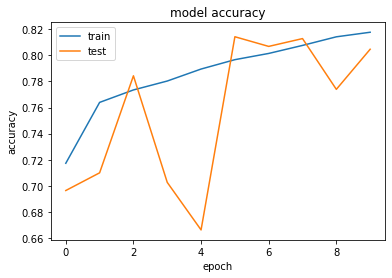

In [17]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

In [19]:
def get_w_avg(preds):
    preds_transformed = []
    for pred in preds:
        term = 0
        for index, weight in enumerate(pred):
            current_term = weight * (index+1)
            term = term + current_term
        preds_transformed.append(term)
    return preds_transformed

def to_classes(one_hot_matrix_preds):
    return (one_hot_matrix_preds + 1)

In [20]:
# Get the probabilities
predictions = model.predict(X_test)

# Get the predictions
predicted_class = to_classes(np.argmax(predictions,axis=1))

# Get the averaged position
avg_class = get_w_avg(predictions)

In [21]:
pred_dict = {}
for index,pred in enumerate(predictions): 
    pred_dict[Y_test.iloc[index].name] = list(pred)

In [22]:
Y_test["Predicted position"] = predicted_class
Y_test["Expectation Value"] = avg_class
Y_test["Correctness"] = Y_test["Predicted position"] == Y_test["end_position"]

X_test["GP_name"] = GP_encoder.inverse_transform(X_test["GP_name"])
X_test["driver_name"] = drivers_encoder.inverse_transform(X_test["driver_name"])
X_test["constructor"] = constructors_encoder.inverse_transform(X_test["constructor"])
X_test["end_status"] = end_status_encoder.inverse_transform(X_test["end_status"])
X_test["circuit_name"] = circuit_encoder.inverse_transform(X_test["circuit_name"])
X_test["compound"] = compound_encoder.inverse_transform(X_test["compound"])


Predictions_results = pd.concat([X_test,Y_test],axis=1)

Predictions_results["difference"] = Predictions_results["end_position"] - Predictions_results["Predicted position"]

<ipython-input-22-e0cd8cdef4de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test["Predicted position"] = predicted_class
<ipython-input-22-e0cd8cdef4de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test["Expectation Value"] = avg_class
<ipython-input-22-e0cd8cdef4de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [23]:
pd.set_option("display.max_rows",None)

In [24]:
y_test = list(Y_test["end_position"])

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.set(font_scale=1.6)
cm = confusion_matrix(y_test, predicted_class)
cm_df = pd.DataFrame(cm,
                     index = [str(i) for i in range(1,n_classes+1)], 
                     columns = [str(i) for i in range(1,n_classes+1)])

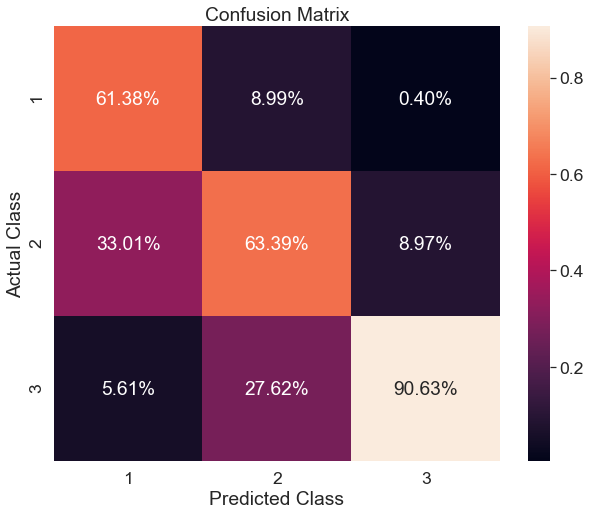

In [26]:
#Plotting a confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df/np.sum(cm_df), annot=True, fmt='.2%')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()
#Normalize, give as fraction

In [42]:
driver_list = list(X_test["driver_name"].unique())
years = list(test_GPs.keys())

for year in years:
    print("\nYear: ", year)
    
    for round_number in test_GPs[year]:
        print("Round: ", round_number)
        
        laps = list(X_test[(X_test["year"]==year)&(X_test["round"]==round_number)]["lap"].unique())
        
        for lap in laps:
            print(f"lap: {lap}")


            # Decide how many subplots - in older races there were more drivers => more subplots         
            fig, ax = plt.subplots(4,5, figsize = (60,30))
            fig.suptitle(f"Year: {year}, round: {round_number}\nLap number: {lap}", fontsize=60)

            lap_idx = list(Predictions_results[(Predictions_results["year"]==year)&
                                               (Predictions_results["round"]==round_number)&
                                               (Predictions_results["lap"]==lap)].index)
            
            driver_row = Predictions_results[(Predictions_results["year"]==year)&
                                             (Predictions_results["round"]==round_number)&
                                             (Predictions_results["lap"]==lap)]
            

            for count, item in enumerate(ax.reshape(-1)):
                
                try:
                    # Probabilities for each position  
                    probs = list(pred_dict[lap_idx[count]])
                    
                    # Expectation value line                  
                    y_top=max(probs)
                    exp_value = driver_row.iloc[count]["Expectation Value"]

                    
                    # For bar colors                  
                    actual_position = driver_row.iloc[count]["end_position"]
                    predicted_position = driver_row.iloc[count]["Predicted position"]
                    
                    colors = ["red" if (value==actual_position) else "gray" for i,value in enumerate(classes)]

                except:
                    print("Error")
                    continue

                # Plot bars and line              
                item.bar(classes,probs,color=colors)
                item.plot([exp_value,exp_value],[0,y_top],'o--y', linewidth=3)
                item.set_xticks(classes)

                item.text(exp_value,y_top, f"Expectation Value={round(exp_value,2)}",horizontalalignment='center',fontweight='bold')
                item.set_title(f"{driver_row.iloc[count].driver_name} \n Actual finishing position: {driver_row.iloc[count].end_position} (shown in red)", fontsize=20)


                fig.text(0.5, 0.05, 'End position', ha='center', va='center',size=60)
                fig.text(0.08, 0.5, 'Probability', ha='center', va='center', rotation='vertical',size=60)

            plt.savefig(f"predictions_{year}_{round_number}_{lap}.jpg")
            plt.close()



Year:  2018
Round:  3
lap: 1
lap: 2
lap: 3
lap: 4
lap: 5
lap: 6
lap: 7
lap: 8
lap: 9
lap: 10
lap: 11
lap: 12
lap: 13
lap: 14
lap: 15
lap: 16
lap: 17
lap: 18
lap: 19
lap: 20
lap: 21
lap: 22
lap: 23
lap: 24
lap: 25
lap: 26
lap: 27
lap: 28
lap: 29
lap: 30
lap: 31
lap: 32
lap: 33
lap: 34
lap: 35
lap: 36
lap: 37
lap: 38
lap: 39
lap: 40
lap: 41
lap: 42
lap: 43
lap: 44
lap: 45
lap: 46
lap: 47
lap: 48
lap: 49
lap: 50
lap: 51
lap: 52
lap: 53
lap: 54
lap: 55
lap: 56
Round:  12
lap: 1
lap: 2
lap: 3
lap: 4
lap: 5
lap: 6
lap: 7
lap: 8
lap: 9
lap: 10
lap: 11
lap: 12
lap: 13
lap: 14
lap: 15
lap: 16
lap: 17
lap: 18
lap: 19
lap: 20
lap: 21
lap: 22
lap: 23
lap: 24
lap: 25
lap: 26
lap: 27
lap: 28
lap: 29
lap: 30
lap: 31
lap: 32
lap: 33
lap: 34
lap: 35
lap: 36
lap: 37
lap: 38
lap: 39
lap: 40
lap: 41
lap: 42
lap: 43
lap: 44
lap: 45
lap: 46
lap: 47
lap: 48
lap: 49
lap: 50
lap: 51
lap: 52
lap: 53
lap: 54
lap: 55
lap: 56
lap: 57
lap: 58
lap: 59
lap: 60
lap: 61
lap: 62
lap: 63
lap: 64
lap: 65
lap: 66
lap: 67


In [43]:
import imageio

# Create the gif 
for year in years:
    print("\nYear: ", year)
    
    for round_number in test_GPs[year]:
        print("Round: ", round_number)
        gif_name = f"Predictions_{year}_{round_number}"
        laps = list(X_test[(X_test["year"]==year)&(X_test["round"]==round_number)]["lap"].unique())
        
        
        with imageio.get_writer(f'{gif_name}.gif', mode='I') as writer:
            for lap in laps:
                print(lap)
                image = imageio.imread(f"predictions_{year}_{round_number}_{lap}.jpg")
                writer.append_data(image)
#                 os.remove(f"predictions_{year}_{round_number}_{lap}.jpg")
            writer.close()
                

        print("\n Done!")


Year:  2018
Round:  3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56

 Done!
Round:  12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70

 Done!

Year:  2019
Round:  8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53

 Done!
Round:  11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64

 Done!

Year:  2020
Round:  8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53

 Done!
Round:  12
1
2
3
4
5
6
7
8